
--- Image Contour Analysis ---
Total Image Area: 237916 pixels
Total Contour Area: 53272.00 pixels
Area of the Image without Contours: 184644.0 pixels
Contour Coverage: 22.39%

Shape Breakdown:
Ellipse:
  Absolute Area: 12109.00 pixels
  Relative Area: 5.09%
Pentagon:
  Absolute Area: 11609.00 pixels
  Relative Area: 4.88%
Ellipse:
  Absolute Area: 8304.00 pixels
  Relative Area: 3.49%
Triangle:
  Absolute Area: 6499.00 pixels
  Relative Area: 2.73%
Rectangle:
  Absolute Area: 14751.00 pixels
  Relative Area: 6.20%


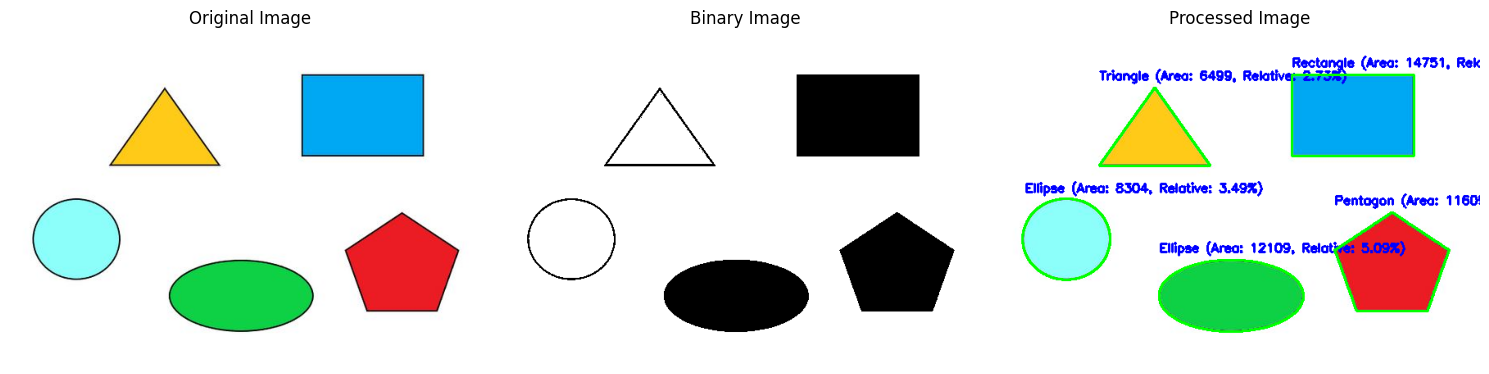

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_image_contours(image_path):
    # Load the image
    image1 = cv2.imread(image_path)

    # Create a copy for drawing
    image_processed = image1.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply inverse thresholding
    _, thresh = cv2.threshold(binary, 200, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate total image area
    total_image_area = image1.shape[0] * image1.shape[1]

    # Store shape details
    shape_details = []

    # Process each contour
    for contour in contours:
        # Approximate the shape
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        num_sides = len(approx)

        # Identify the shape
        if num_sides == 3:
            shape_name = "Triangle"
        elif num_sides == 4:
            shape_name = "Rectangle"
        elif num_sides == 5:
            shape_name = "Pentagon"
        elif 6 < num_sides < 15:
            shape_name = "Ellipse"
        else:
            shape_name = "Circle"

        # Calculate the area
        area = cv2.contourArea(contour)

        # Calculate relative area
        relative_area = (area / total_image_area) * 100

        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(approx)

        # Draw the contours and label the shapes
        cv2.drawContours(image_processed, [contour], -1, (0, 255, 0), 2)
        cv2.putText(image_processed,
                    f"{shape_name} (Area: {int(area)}, Relative: {relative_area:.2f}%)",
                    (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Store shape details
        shape_details.append({
            'shape': shape_name,
            'absolute_area': area,
            'relative_area': relative_area
        })

    # Calculate total contour area
    total_contour_area = sum(detail['absolute_area'] for detail in shape_details)

    # Print detailed analysis
    print("\n--- Image Contour Analysis ---")
    print(f"Total Image Area: {total_image_area} pixels")
    print(f"Total Contour Area: {total_contour_area:.2f} pixels")
    print(f"Area of the Image without Contours: {total_image_area - total_contour_area} pixels")
    print(f"Contour Coverage: {(total_contour_area/total_image_area)*100:.2f}%")

    print("\nShape Breakdown:")
    for detail in shape_details:
        print(f"{detail['shape']}:")
        print(f"  Absolute Area: {detail['absolute_area']:.2f} pixels")
        print(f"  Relative Area: {detail['relative_area']:.2f}%")

    # Visualize results
    plt.figure(figsize=(15,15))

    plt.subplot(131)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(132)
    plt.title("Binary Image")
    plt.imshow(binary, cmap='gray')
    plt.axis('off')

    plt.subplot(133)
    plt.title("Processed Image")
    plt.imshow(cv2.cvtColor(image_processed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return shape_details

# Usage
image_path = 'contours.JPG'
results = analyze_image_contours(image_path)